In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stumbleupon/test.tsv
/kaggle/input/stumbleupon/train.tsv
/kaggle/input/stumbleupon/sampleSubmission.csv
/kaggle/input/stumbleupon/raw_content.zip


In [2]:
data = pd.read_csv('/kaggle/input/stumbleupon/train.tsv',delimiter="\t")
data.head()

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,...,1,1,24,0,5424,170,8,0.152941,0.079130,0
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,...,1,1,40,0,4973,187,9,0.181818,0.125448,1
2,http://www.menshealth.com/health/flu-fighting-...,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,...,1,1,55,0,2240,258,11,0.166667,0.057613,1
3,http://www.dumblittleman.com/2007/12/10-foolpr...,6684,"{""title"":""10 Foolproof Tips for Better Sleep ""...",health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,...,1,0,24,0,2737,120,5,0.041667,0.100858,1
4,http://bleacherreport.com/articles/1205138-the...,9006,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,...,1,1,14,0,12032,162,10,0.098765,0.082569,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395 entries, 0 to 7394
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             7395 non-null   object 
 1   urlid                           7395 non-null   int64  
 2   boilerplate                     7395 non-null   object 
 3   alchemy_category                7395 non-null   object 
 4   alchemy_category_score          7395 non-null   object 
 5   avglinksize                     7395 non-null   float64
 6   commonlinkratio_1               7395 non-null   float64
 7   commonlinkratio_2               7395 non-null   float64
 8   commonlinkratio_3               7395 non-null   float64
 9   commonlinkratio_4               7395 non-null   float64
 10  compression_ratio               7395 non-null   float64
 11  embed_ratio                     7395 non-null   float64
 12  framebased                      73

In [4]:
obj_cols = [col for col in data.columns if data[col].dtypes=="object"]
obj_cols

['url',
 'boilerplate',
 'alchemy_category',
 'alchemy_category_score',
 'is_news',
 'news_front_page']

In [5]:
data['news_front_page'].value_counts()

0    5853
?    1248
1     294
Name: news_front_page, dtype: int64

In [6]:
data['alchemy_category_score'].value_counts()

?            2342
0.85           82
0.0784091      40
0.849999       12
0.535009       10
             ... 
0.776397        1
0.351398        1
0.642615        1
0.640796        1
0.617876        1
Name: alchemy_category_score, Length: 4806, dtype: int64

In [7]:
data['alchemy_category_score'] = data['alchemy_category_score'].replace('?',None).astype('float')

In [8]:
data['alchemy_category'].value_counts()

?                     2342
recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
unknown                  6
weather                  4
Name: alchemy_category, dtype: int64

In [9]:
#data['alchemy_category'].replace('?',None).astype('category').cat.codes

In [10]:
data['is_news'].value_counts()

1    4552
?    2843
Name: is_news, dtype: int64

In [11]:
# Using TransformerMixin

from sklearn.base import BaseEstimator, TransformerMixin

class RemoveQuestionMarkCast(BaseEstimator,TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.replace("?",None).astype('category').apply(lambda x: x.cat.codes)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [12]:
import numpy as np

class RemoveOutliers(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        self.IQR = 0
        self.Q1 = 0
        self.Q3 = 0
        self.lb = 0
        self.ub = 0
        pass
    
    def fit(self, X, y=None):
        self.Q1 = np.quantile(X,0.25)
        self.Q3 = np.quantile(X,0.75)
        self.IQR = self.Q3 - self.Q1
        self.ub = self.Q3 + 1.5*self.IQR
        self.lb = self.Q1 - 1.5*self.IQR
        return self
    
    def transform(self, X):
        X = np.where(X<self.lb,self.lb,X)
        X = np.where(X>self.ub,self.ub,X)
        return X
    

In [13]:
"""from sklearn.preprocessing import FunctionTransformer

def get_cat_codes(X):
    return X.cat.codes

cat_coder = FunctionTransformer(get_cat_codes)
"""

'from sklearn.preprocessing import FunctionTransformer\n\ndef get_cat_codes(X):\n    return X.cat.codes\n\ncat_coder = FunctionTransformer(get_cat_codes)\n'

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('impute',SimpleImputer(strategy="median")),
    ('remove_outliers',RemoveOutliers())
])


cat_pipeline = Pipeline([
    ('remove_nan',RemoveQuestionMarkCast()),
    ('impute', SimpleImputer(strategy='most_frequent'))
])


In [15]:
from sklearn.compose import make_column_selector,make_column_transformer

preprocessor = make_column_transformer(
    (num_pipeline,make_column_selector(dtype_include=np.number)),
    (cat_pipeline,make_column_selector(dtype_include=object))
)

Model:  Random Forest


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Best Estimator:  Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('remove_outliers',
                                                                   RemoveOutliers())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7c123f4e2710>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('remove_nan',
                                                                   RemoveQuestionMarkCast()),
                                                                  ('impute',
                                                                   SimpleImputer(

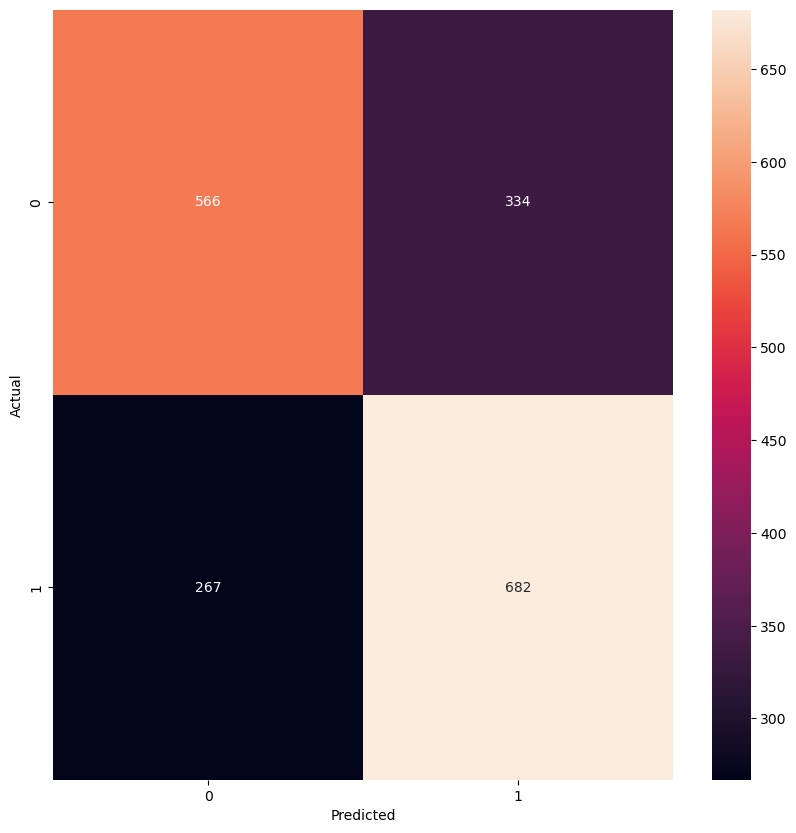

Model:  Logistic Regression


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Estimator:  Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('remove_outliers',
                                                                   RemoveOutliers())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7c123c14d1b0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('remove_nan',
                                                                   RemoveQuestionMarkCast()),
                                                                  ('impute',
                                                                   SimpleImputer(

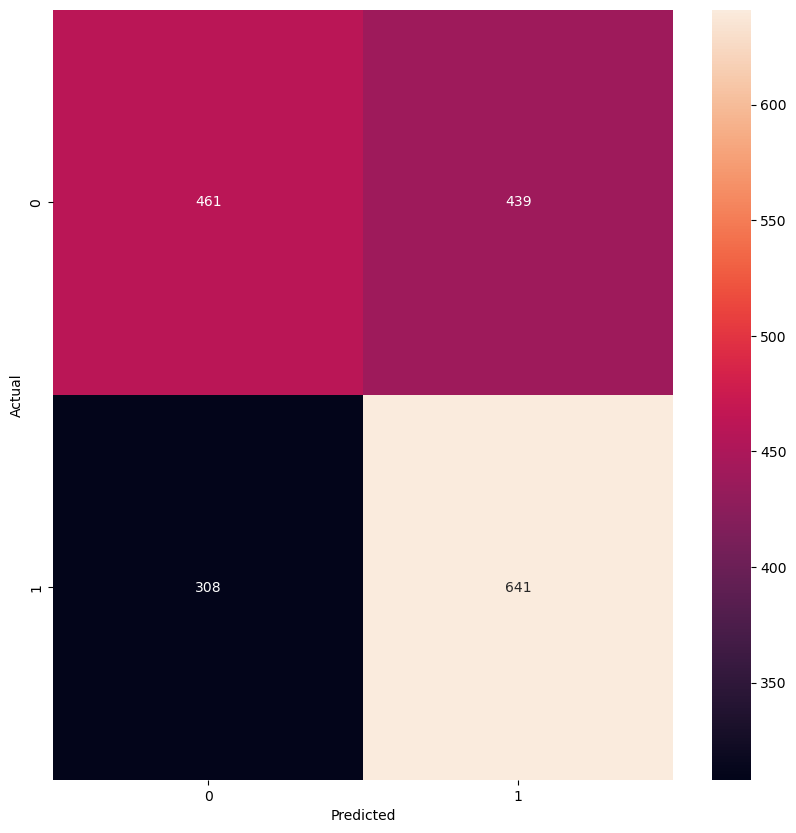

Model:  Decision Tree
Best Estimator:  Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('remove_outliers',
                                                                   RemoveOutliers())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7c1237fd3670>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('remove_nan',
                                                                   RemoveQuestionMarkCast()),
                                                                  ('impute',
                                                           

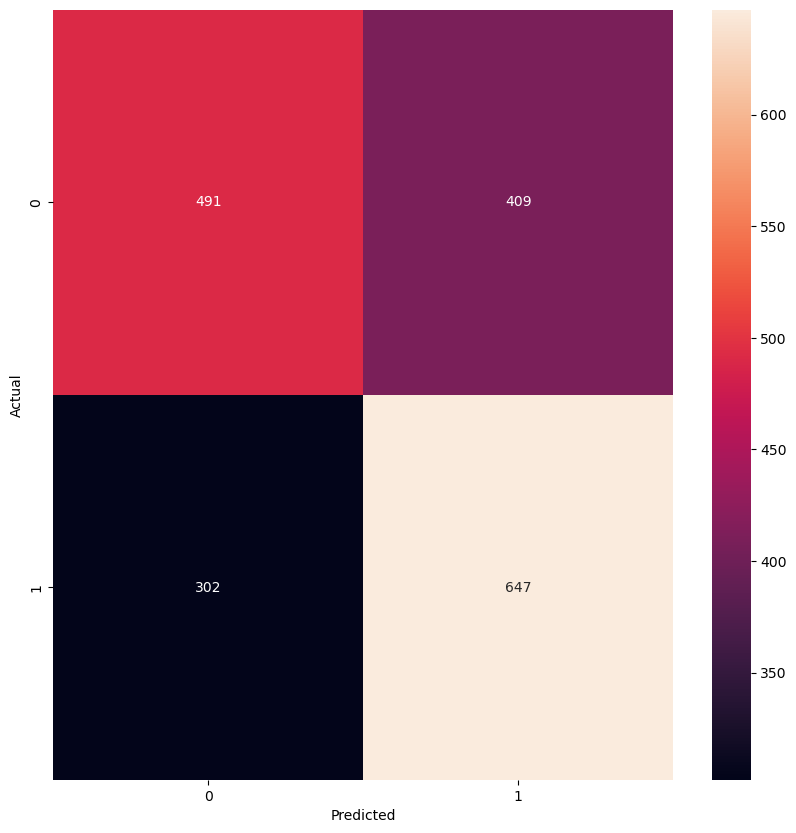

Model:  Gradient Boosting
Best Estimator:  Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('remove_outliers',
                                                                   RemoveOutliers())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7c123c2ec3d0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('remove_nan',
                                                                   RemoveQuestionMarkCast()),
                                                                  ('impute',
                                                       

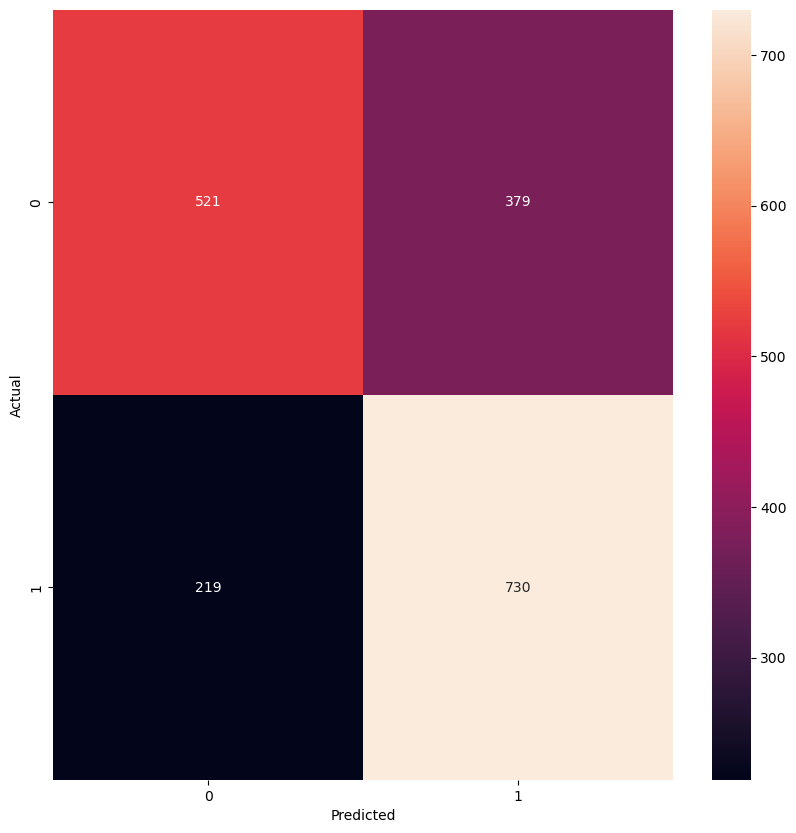

In [20]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

rfc = RandomForestClassifier()
gb = GradientBoostingClassifier()
lr = LogisticRegression()
dt = DecisionTreeClassifier()

models = [rfc,lr,dt,gb]

X_train, X_test, y_train, y_test = train_test_split(data.drop(['url','boilerplate','label'],axis=1),data['label'])

n_features = len(data.columns)

param_rfc = {
    'model__n_estimators': [10,20,30,40],
    'model__max_features': ['sqrt','log2',n_features-1],
    'model__max_depth': [3,6,9,12,15]
}

param_lr = {
    'model__penalty':['l1','l2'],
    'model__C': [0.0001,0.001,0.01,1,10]
}

param_dt = {
    'model__criterion': ['gini','entropy'],
    'model__max_features': ['sqrt','log2',n_features-1],
    'model__max_depth': [3,6,9,12,15]
}

param_gb = {
    'model__n_estimators': [10,20,30,40],
    'model__max_features': ['sqrt','log2',n_features-1],
    'model__max_depth': [3,6,9,12,15],
    'model__learning_rate': [0.0001,0.001,0.01,1]
}

params = [param_rfc,param_lr,param_dt,param_gb]

grid_dict = ['Random Forest','Logistic Regression','Decision Tree','Gradient Boosting']

for idx,model in enumerate(models):
    full_pipeline = Pipeline([
        ('preprocessor',preprocessor),
        ('model',model)
    ])
    gs = GridSearchCV(full_pipeline,params[idx],scoring='accuracy',cv=5,n_jobs=-1)
    print('Model: ',grid_dict[idx])
    gs_fit = gs.fit(X_train,y_train)
    print("Best Estimator: ",gs_fit.best_estimator_)
    print("Parameter that gave best result on hold out data: ",gs_fit.best_params_)
    print("Score of best Estimator: ",gs_fit.best_score_)
    print("Mean Training Accuracy: ",gs_fit.score(X_test,y_test))
    preds = gs_fit.predict(X_test)
    pred_proba = gs_fit.predict_proba(X_test)
    print(pred_proba)
    print("Accuracy Score ",accuracy_score(y_test,preds))
    
    conf_mat = confusion_matrix(y_test,preds)
    fig,ax = plt.subplots(figsize=(10,10))
    sns.heatmap(conf_mat,annot=True,fmt='d')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    